In [1]:
import pandas as pd
import seaborn as sns

# Chargement des données 

In [2]:
data = pd.read_csv("datas/ObesityDataSet_raw_and_data_sinthetic.csv")

# Analyse Exploratoire des données (EDA)

In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
data.columns.tolist()

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

### 1. Détéction de valeurs manquantes

In [6]:
data.columns.isna().sum()

np.int64(0)

### 2. Détéction des doublons

In [7]:
data.duplicated().sum()

np.int64(24)

### 3. Suppression des doublons

In [8]:
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

### 4. Analyse de la distribution des valeurs numériques

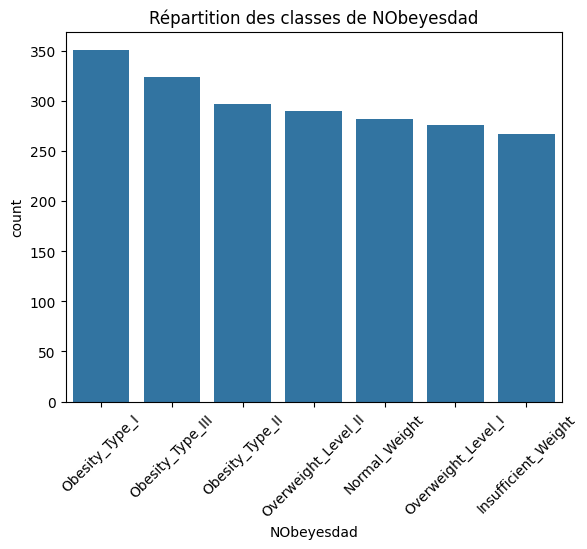

In [9]:
import matplotlib.pyplot as plt

sns.countplot(x=data["NObeyesdad"], order=data["NObeyesdad"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Répartition des classes de NObeyesdad")
plt.show()


### 5. Détection des valeurs aberrantes

### 5.a Methode boite à moustaches

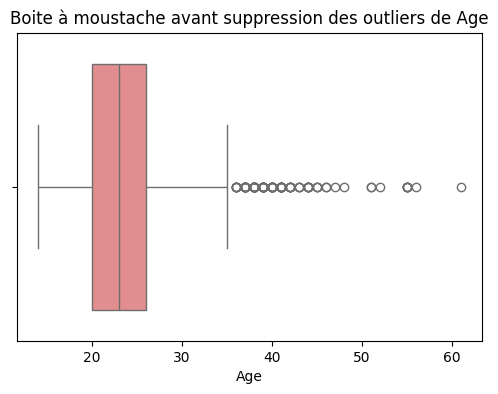

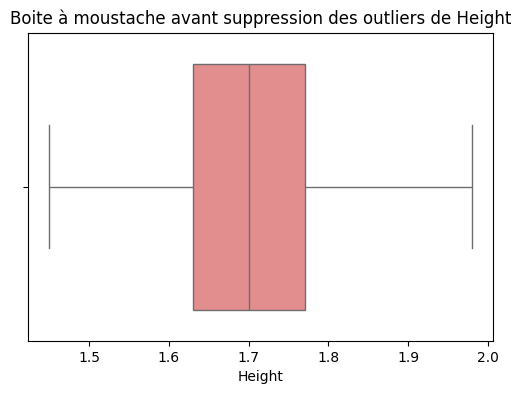

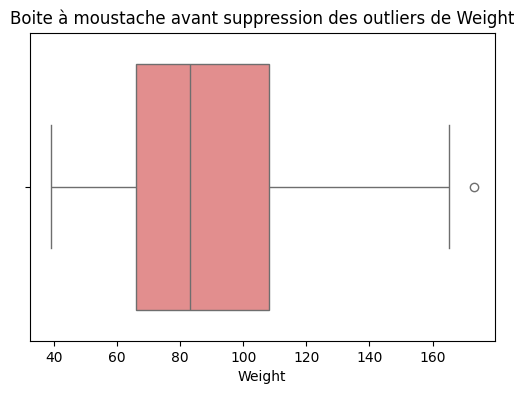

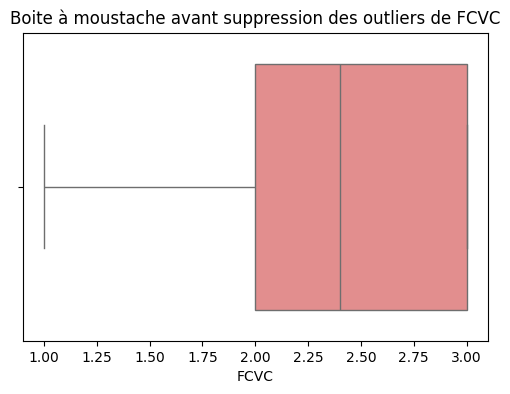

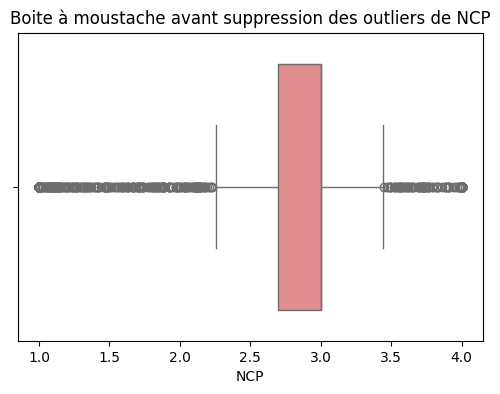

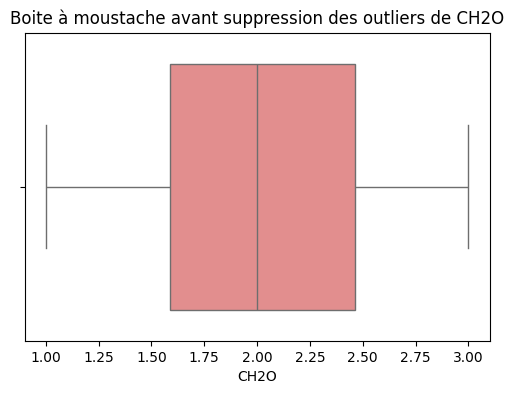

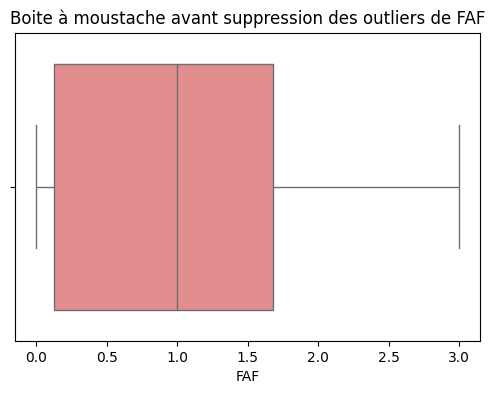

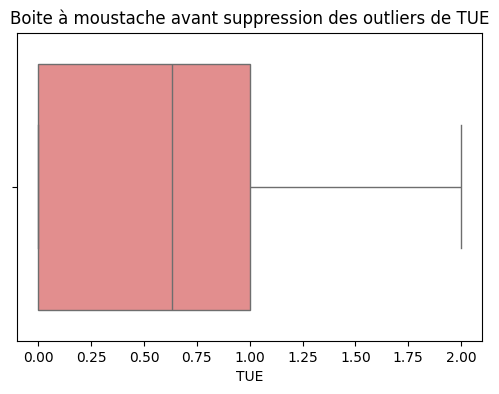

In [10]:
for i in data.select_dtypes(include="number").columns.tolist():
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[i], color="lightcoral")
    plt.title(f"Boite à moustache avant suppression des outliers de {i}")
    plt.show()

### 4.b Methodes des interquartiles

In [11]:
def outliers(dframe):
    outliers = dframe.copy()
    for i in dframe.select_dtypes(include="number").columns.tolist():
        q1 = dframe[i].quantile(0.25)
        q3 = dframe[i].quantile(0.75)
        iqr = q3 - q1
        b_inf = q1 - 1.5*iqr
        b_sup = q3 + 1.5*iqr
        outliers = dframe[(dframe[i] < b_inf) | (dframe[i] > b_sup)]
    return outliers
outliers = outliers(data)
outliers

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [12]:
from math import sqrt
data["IMC"] = data["Weight"] / (data["Height"] ** 2)
data = data.drop(columns={"Weight", "Height"}, axis=1)
data.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC
0,Female,21,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


### 5.b Mis à l'echelle des valeurs

In [13]:
X = data.drop("NObeyesdad", axis=1)
y = data["NObeyesdad"]

In [14]:
from sklearn.preprocessing import StandardScaler
for col in X.columns.tolist():
    freq_encoding = X[col].value_counts(normalize=True)
    X[col] = X[col].map(freq_encoding)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,IMC
0,-1.008179,1.000717,0.460394,-2.754719,0.713214,0.853417,0.429522,0.146755,1.742825,0.219584,1.744916,0.446444,-1.206288,0.576897,-0.368860
1,-1.008179,1.000717,0.460394,-2.754719,0.917722,0.853417,0.429522,-6.814090,0.046116,-4.554073,-0.340640,1.537634,0.692449,0.576897,-0.368860
2,0.991887,1.000717,0.460394,-2.754719,0.713214,0.853417,0.429522,0.146755,1.742825,0.219584,0.405965,0.446444,-2.650757,0.576897,-0.368860
3,0.991887,-1.338594,-2.172052,-2.754719,0.917722,0.853417,0.429522,0.146755,1.742825,0.219584,0.405965,1.537634,-2.650757,-2.374877,0.260071
4,0.991887,0.238770,-2.172052,-2.754719,0.713214,-0.924236,0.429522,0.146755,1.742825,0.219584,1.744916,1.537634,0.692449,0.576897,-0.368860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,-1.008179,1.000717,0.460394,0.363013,0.917722,0.853417,0.429522,0.146755,-0.729523,0.219584,-0.760219,-0.801252,0.692449,0.576897,-0.368860
2083,-1.008179,0.238770,0.460394,0.363013,0.917722,0.853417,0.429522,0.146755,-0.681045,0.219584,-0.797241,-0.796904,0.692449,0.576897,-0.368860
2084,-1.008179,1.000717,0.460394,0.363013,0.917722,0.853417,0.429522,0.146755,-0.713363,0.219584,-0.791071,-0.801252,0.692449,0.576897,-0.368860
2085,-1.008179,-0.643484,0.460394,0.363013,0.917722,0.853417,0.429522,0.146755,-0.713363,0.219584,-0.784901,-0.796904,0.692449,0.576897,-0.368860


### 5. Creation des train set avec train_test_split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1669, 15) (1669,) (418, 15) (418,)


### 5.a Compter le nombre d’observations par groupe

In [16]:
data["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

### 6. Gestion du déséquilibre des classes avec la technique de sous-échantiyonnage

In [17]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print("Avant équilibrage :", Counter(y))

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

print("Après équilibrage :", Counter(y_resampled))

Avant équilibrage : Counter({'Obesity_Type_I': 351, 'Obesity_Type_III': 324, 'Obesity_Type_II': 297, 'Overweight_Level_II': 290, 'Normal_Weight': 282, 'Overweight_Level_I': 276, 'Insufficient_Weight': 267})
Après équilibrage : Counter({'Normal_Weight': 351, 'Overweight_Level_I': 351, 'Overweight_Level_II': 351, 'Obesity_Type_I': 351, 'Insufficient_Weight': 351, 'Obesity_Type_II': 351, 'Obesity_Type_III': 351})


# 7. Entrainement des models de classifications

In [18]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

ls = LinearSVC(max_iter = 5000, random_state=42)
ls.fit(X_train, y_train)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 8. Evaluation des modèles

In [19]:
results = []
models = {
    "linear svc": ls,
    "random forest classifier": rfc,
    "logistic regression": lr
}


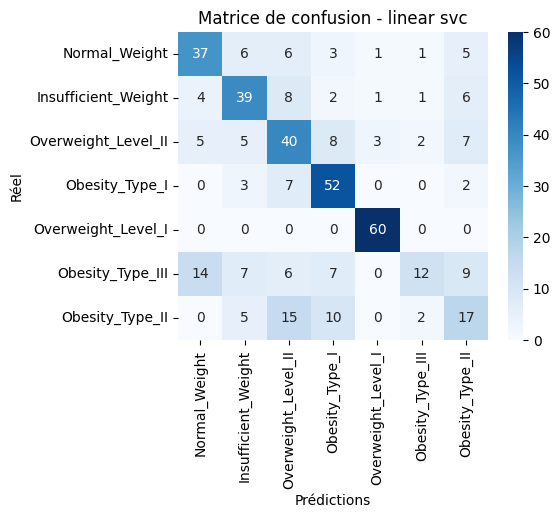

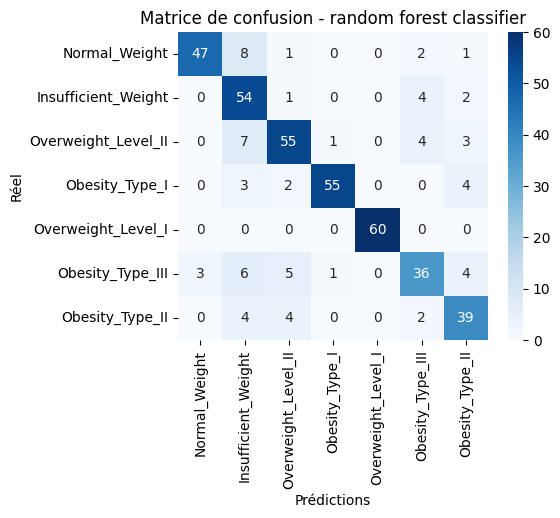

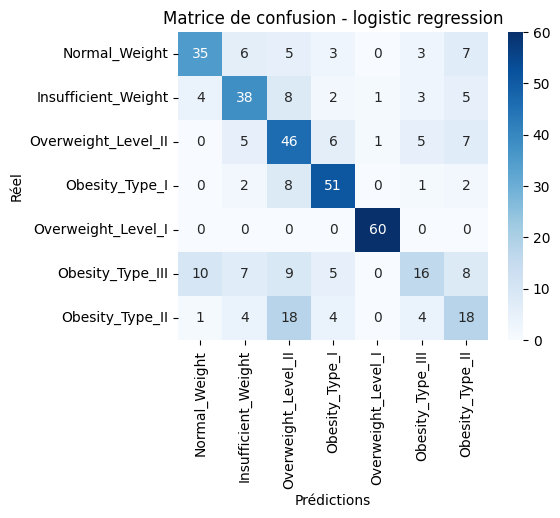

In [20]:
from sklearn.metrics import confusion_matrix

def evaluation_with_confusion_matrix():
    for name, model in models.items():
        results.append({
            "Models": name,
            "confusion_matrix":confusion_matrix(y_test, model.predict(X_test))
        })
        cm = confusion_matrix(y_test, model.predict(X_test))
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                    xticklabels=set(y_test), 
                    yticklabels=set(y_test))
        plt.title(f"Matrice de confusion - {name}")
        plt.xlabel("Prédictions")
        plt.ylabel("Réel")
        plt.show()
            
evaluation_with_confusion_matrix()

In [21]:
from sklearn.metrics import recall_score

def evaluation_with_recall_score():
    for name, model in models.items():
        results.append({
            "Models": name,
            "recall score": recall_score(y_test, model.predict(X_test), average="weighted")
        })   
evaluation_with_recall_score()

In [22]:
from sklearn.metrics import f1_score

def evaluation_with_f1_score():
    for name, model in models.items():
        results.append({
            "Models": name,
            "f1_score": f1_score(y_test, model.predict(X_test), average="weighted")
        })
            
evaluation_with_f1_score()

In [23]:
result_score = pd.DataFrame(results)
result_score.sort_values(by="f1_score", ascending=False)

,Models,confusion_matrix,recall score,f1_score
7,random forest classifier,NaN,NaN,0.829777
8,logistic regression,NaN,NaN,0.623986
6,linear svc,NaN,NaN,0.598328
0,linear svc,"[[37, 6, 6, 3, 1, 1, 5], [4, 39, 8, 2, 1, 1, 6...",NaN,NaN
1,random forest classifier,"[[47, 8, 1, 0, 0, 2, 1], [0, 54, 1, 0, 0, 4, 2...",NaN,NaN
2,logistic regression,"[[35, 6, 5, 3, 0, 3, 7], [4, 38, 8, 2, 1, 3, 5...",NaN,NaN
3,linear svc,NaN,0.614833,NaN
4,random forest classifier,NaN,0.827751,NaN
5,logistic regression,NaN,0.631579,NaN


### 9. Validation croisée

In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np
val_score = []
for name, model in models.items():
    for i in ['precision_weighted', 'recall_weighted', 'f1_weighted']:
        score = cross_val_score(model, X_train, y_train, cv=3, scoring=i, n_jobs=-1).mean()
        val_score.append({
            "Model":name,
            "Metric":i,
            "Moyenne Score": score,
            "Ecart-type score": np.std(score)
        })
val_score = pd.DataFrame(val_score)
val_score.sort_values(by="Metric", ascending=False)

,Model,Metric,Moyenne Score,Ecart-type score
1,linear svc,recall_weighted,0.585978,0.0
4,random forest classifier,recall_weighted,0.779516,0.0
7,logistic regression,recall_weighted,0.605145,0.0
0,linear svc,precision_weighted,0.574092,0.0
3,random forest classifier,precision_weighted,0.791084,0.0
6,logistic regression,precision_weighted,0.597588,0.0
2,linear svc,f1_weighted,0.563984,0.0
5,random forest classifier,f1_weighted,0.777262,0.0
8,logistic regression,f1_weighted,0.591622,0.0


### 10. Optimisation des hyperparamètres

In [25]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import joblib

# Dictionnaire des grilles d'hyperparamètres
param_grids = {
    "linear svc": {
        "C": [0.1, 1, 10],
        "loss": ["hinge", "squared_hinge"],
        "max_iter": [5000, 10000]
    },
    "random forest classifier": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    },
    "logistic regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l2"],
        "solver": ["lbfgs", "saga"],
        "max_iter": [1000, 5000]
    }
}

# Dictionnaire des modèles
models_filtered = {
    "linear svc": LinearSVC(random_state=42),
    "random forest classifier": RandomForestClassifier(random_state=42),
    "logistic regression": LogisticRegression(random_state=42)
}

# Stockage des résultats
grid_results = []
best_models = {}

# Boucle d’optimisation
for name, model in models_filtered.items():
    print(f"\nOptimisation de {name}...")
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring="f1_weighted",
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print(f"Meilleurs paramètres pour {name} : {grid_search.best_params_}")
    print(f"Score moyen (CV) : {grid_search.best_score_:.4f}")
    
    # Sauvegarde du meilleur modèle
    best_models[name] = grid_search.best_estimator_
    
    # Ajout des résultats dans une liste
    grid_results.append({
        "Modele": name,
        "F1_score": grid_search.best_score_,
        "Best_params": grid_search.best_params_
    })

# Création d’un DataFrame trié
results_df = pd.DataFrame(grid_results)
results_df = results_df.sort_values(by="F1_score", ascending=False).reset_index(drop=True)

print("\nRésumé des résultats :")
print(results_df)

best_model_name = results_df.iloc[0]["Modele"]
best_model = best_models[best_model_name]

print(f"\n Le meilleur modèle est '{best_model_name}' avec F1_score = {results_df.iloc[0]['F1_score']:.4f}")
print(f"Modèle sauvegardé dans : best_model_{best_model_name.replace(' ', '_')}.pkl")



Optimisation de linear svc...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/meissagningue/Projects/dev_ia/ObesiTrack/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/meissagningue/Projects/dev_ia/ObesiTrack/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/meissagningue/Projects/dev_ia/ObesiTrack/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/meissagningue/Projects/dev_ia/ObesiTrack/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/meissagningue/Projects/dev_ia/ObesiTrack/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to co

Meilleurs paramètres pour linear svc : {'C': 10, 'loss': 'squared_hinge', 'max_iter': 5000}
Score moyen (CV) : 0.5644

Optimisation de random forest classifier...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs paramètres pour random forest classifier : {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Score moyen (CV) : 0.7931

Optimisation de logistic regression...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/meissagningue/Projects/dev_ia/ObesiTrack/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meissagningue/Projects/dev_ia/ObesiTrack/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meissagningue/Projects/dev_ia/ObesiTrack/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meissagningue/Projects/dev_ia/ObesiTrack/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meissagningue/Projects/dev_ia/ObesiTrack/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: Convergence

Meilleurs paramètres pour logistic regression : {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Score moyen (CV) : 0.5923

Résumé des résultats :
                     Modele  F1_score  \
0  random forest classifier  0.793122   
1       logistic regression  0.592344   
2                linear svc  0.564441   

                                         Best_params  
0  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...  
1  {'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...  
2  {'C': 10, 'loss': 'squared_hinge', 'max_iter':...  

 Le meilleur modèle est 'random forest classifier' avec F1_score = 0.7931
Modèle sauvegardé dans : best_model_random_forest_classifier.pkl


### 11. Sauvegarde du modele

In [26]:
import joblib

best_model = best_models["random forest classifier"]

joblib.dump(best_model, "models/best_model.pkl")
print("Modèle sauvegardé dans best_model.pkl")

Modèle sauvegardé dans best_model.pkl
